* Created By: Blessy Louis (2348416) 4MDS'B'
* Created On : 07.07.2024

## **Lab Exercise 2:**
* Graph Visualization: Using libraries like NetworkX, visualize different graph types highlighting their properties

## **Domain: Transportation and Logistics**

# **Dataset Description:**
https://www.kaggle.com/datasets/harshsingh2209/supply-chain-analysis?resource=download



The dataset used in this analysis is a fictional example meant to represent real-world data typically found in supply chain management and product distribution networks. The dataset consists of information about various products, their suppliers, shipping carriers, and associated attributes. The columns in the dataset provide details that can be used to analyze the relationships between products, suppliers, and other entities in the supply chain.

#### Columns and Their Descriptions:

1. **Product type**: The category or type of the product (e.g., haircare, skincare, cosmetics).
2. **SKU**: Stock Keeping Unit, a unique identifier for each product.
3. **Price**: The price of the product.
4. **Availability**: The number of units available in stock.
5. **Number of products sold**: The total number of units sold.
6. **Revenue generated**: The total revenue generated from the sales of the product.
7. **Customer demographics**: Information about the customer demographic for each product (e.g., Non-binary, Female, Male, Unknown).
8. **Stock levels**: The current stock level of the product.
9. **Lead times**: The lead time for the product to be restocked.
10. **Order quantities**: The quantities in which the product is ordered.
11. **Shipping times**: The time it takes to ship the product.
12. **Shipping carriers**: The carriers used for shipping the product (e.g., Carrier A, Carrier B, Carrier C).
13. **Shipping costs**: The cost associated with shipping the product.
14. **Supplier name**: The name of the supplier providing the product.
15. **Location**: The location of the supplier.
16. **Lead time**: The lead time from the supplier to deliver the product.
17. **Production volumes**: The production volumes of the product.
18. **Manufacturing lead time**: The time taken to manufacture the product.
19. **Manufacturing costs**: The cost of manufacturing the product.
20. **Inspection results**: The results of product inspection (e.g., Pending, Pass, Fail).
21. **Defect rates**: The defect rate of the product.
22. **Transportation modes**: The mode of transportation used (e.g., Road, Air, Rail, Sea).
23. **Routes**: The transportation routes used (e.g., Route A, Route B, Route C).
24. **Costs**: The overall cost associated with the product, including manufacturing and transportation costs.



# Objective
The objective of this analysis is to construct and manipulate a graph representing the relationships between products and their suppliers.

* Understand the connectivity between products and suppliers.
* Identify key suppliers and their impact on the supply chain.
* Analyze the structure of the network to make informed decisions about supply chain management.
* Perform basic graph transformations to study the effects on the network.

# About the Graph
* Nodes Set: The nodes in the graph represent the products (identified by SKU) and the suppliers. Each product and supplier is a node in the network.
* Edges Set: The edges represent the relationships between products and their suppliers. Each edge carries attributes such as lead time from the supplier.

# **Implementation Code**

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('/content/supply_chain_data.csv')

# **Creating Product- supplier graph**

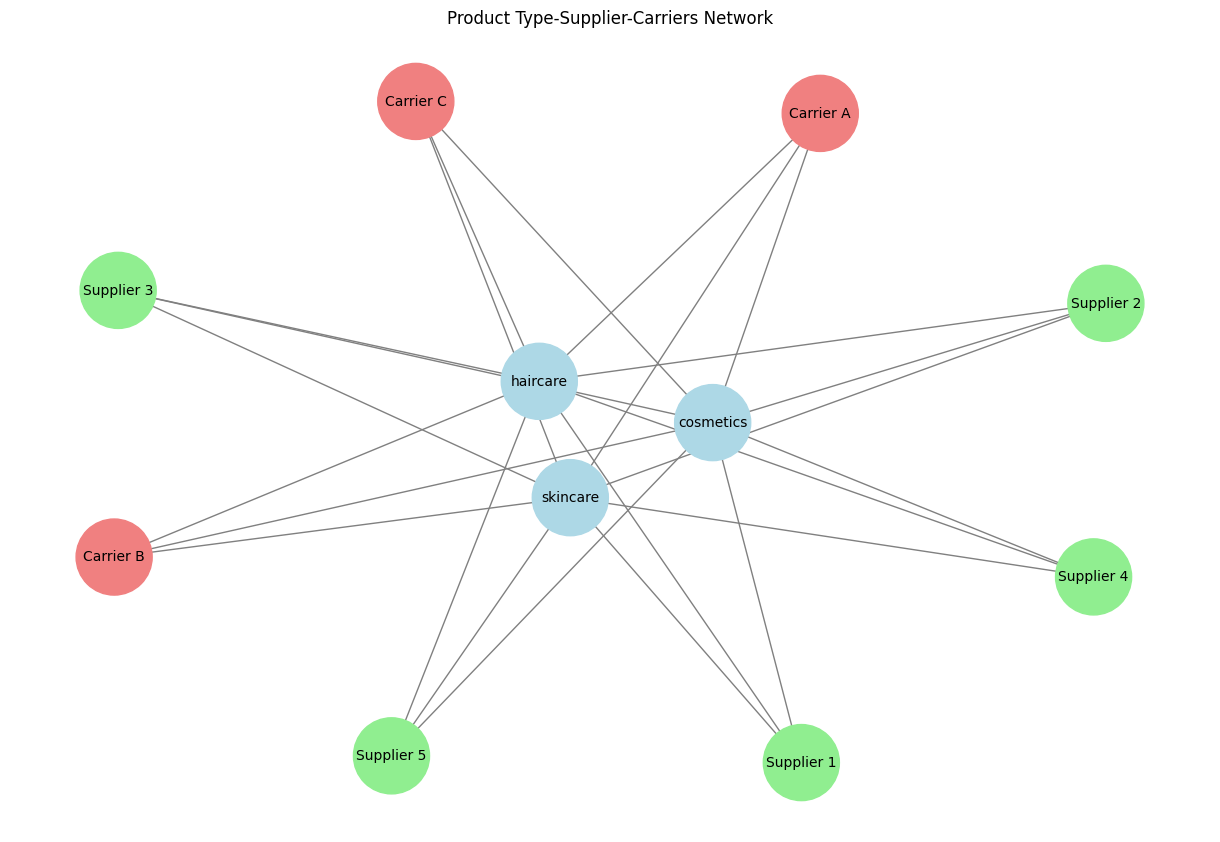

In [ ]:
# Filter the dataset to include only specific product types
filtered_df = df[df['Product type'].isin(['haircare', 'skincare', 'cosmetics'])]

# Create an undirected graph for Product Type-Supplier-Carriers Network
G = nx.Graph()

# Adding nodes for Product Types
product_types = ['haircare', 'skincare', 'cosmetics']
G.add_nodes_from(product_types, type='product')

# Adding edges for Product Types to Suppliers and Shipping Carriers
for index, row in filtered_df.iterrows():
    product_type = row['Product type']
    supplier = row['Supplier name']
    carrier = row['Shipping carriers']

    # Adding nodes for Suppliers and Shipping Carriers
    G.add_node(supplier, type='supplier')
    G.add_node(carrier, type='carrier')

    # Adding edges from Product Types to Suppliers and Shipping Carriers
    G.add_edge(product_type, supplier)
    G.add_edge(product_type, carrier)

# Function to draw the graph
def draw_graph(G, title):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    node_colors = ['lightblue' if G.nodes[n]['type'] == 'product' else 'lightgreen' if G.nodes[n]['type'] == 'supplier' else 'lightcoral' for n in G.nodes]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=3000, font_size=10)
    plt.title(title)
    plt.show()

# Draw the Product Type-Supplier-Carriers Network graph
draw_graph(G, "Product Type-Supplier-Carriers Network")


# **Operations and Visualizations**

Directed Graph

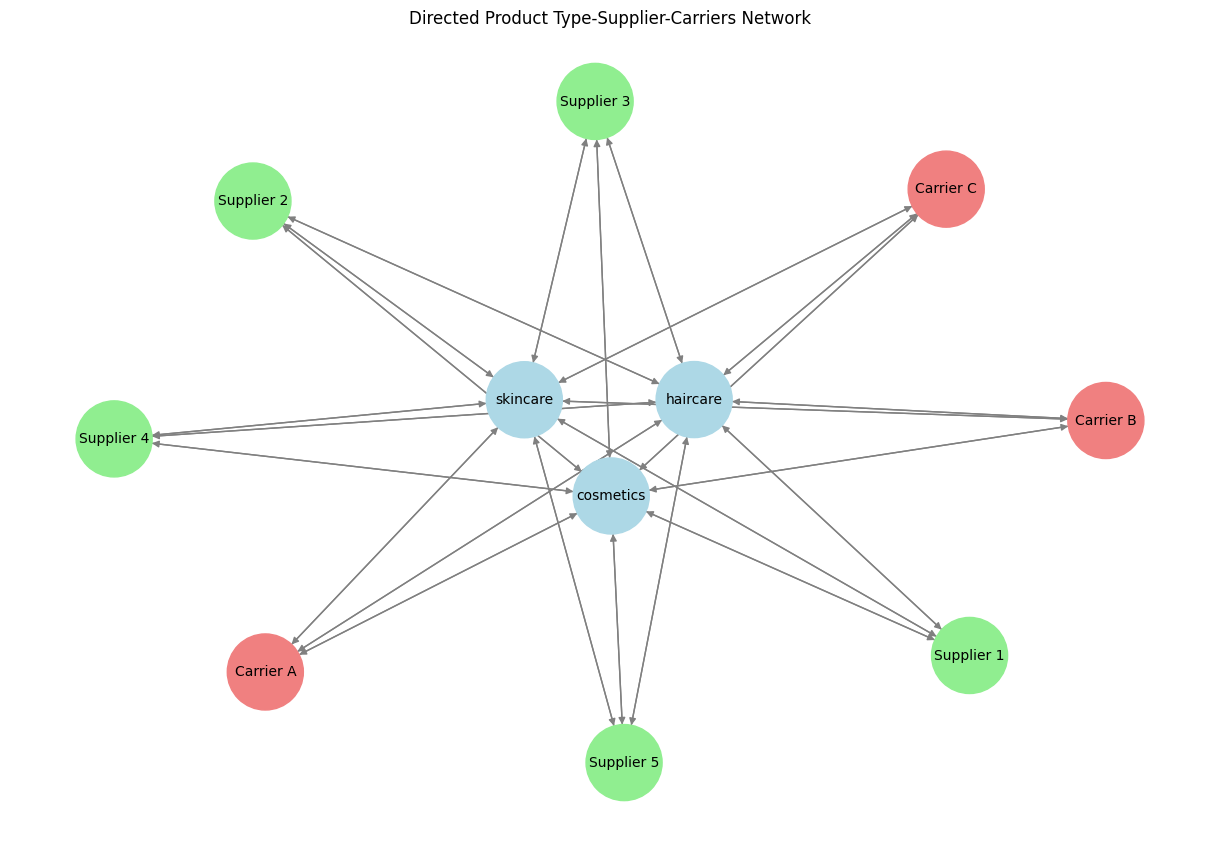

In [ ]:
# Convert the graph to a directed graph
G_directed = G.to_directed()

# Draw the Directed Graph
draw_graph(G_directed, "Directed Product Type-Supplier-Carriers Network")


Weighted graph

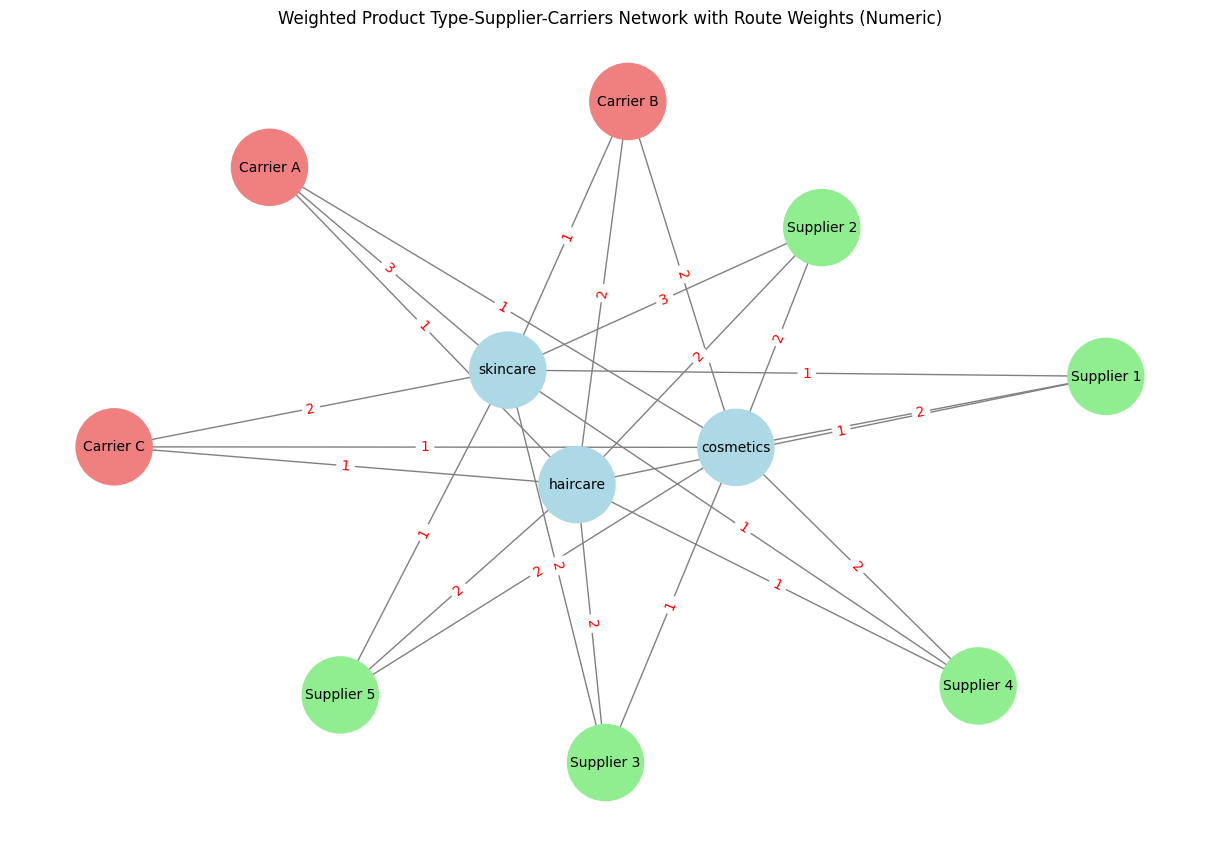

In [ ]:
# Filter the dataset to include only specific product types
filtered_df = df[df['Product type'].isin(['haircare', 'skincare', 'cosmetics'])]

# Create an undirected graph for Product Type-Supplier-Carriers Network
G = nx.Graph()

# Adding nodes for Product Types
product_types = ['haircare', 'skincare', 'cosmetics']
G.add_nodes_from(product_types, type='product')

# Adding edges for Product Types to Suppliers and Shipping Carriers with weights
for index, row in filtered_df.iterrows():
    product_type = row['Product type']
    supplier = row['Supplier name']
    carrier = row['Shipping carriers']
    route = row['Routes']

    # Map routes to numeric weights (for demonstration, using simple mapping)
    route_weight = {'Route A': 1, 'Route B': 2, 'Route C': 3}.get(route, 1)  # Default to 1 if route not in mapping

    # Adding nodes for Suppliers and Shipping Carriers
    G.add_node(supplier, type='supplier')
    G.add_node(carrier, type='carrier')

    # Adding edges from Product Types to Suppliers and Shipping Carriers with weights
    G.add_edge(product_type, supplier, weight=route_weight)
    G.add_edge(product_type, carrier, weight=route_weight)

# Function to draw the graph
def draw_graph(G, title):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    node_colors = ['lightblue' if G.nodes[n]['type'] == 'product' else 'lightgreen' if G.nodes[n]['type'] == 'supplier' else 'lightcoral' for n in G.nodes]
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=3000, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title(title)
    plt.show()

# Draw the initial Weighted Product Type-Supplier-Carriers Network graph
draw_graph(G, "Weighted Product Type-Supplier-Carriers Network with Route Weights (Numeric)")

Complete Graph

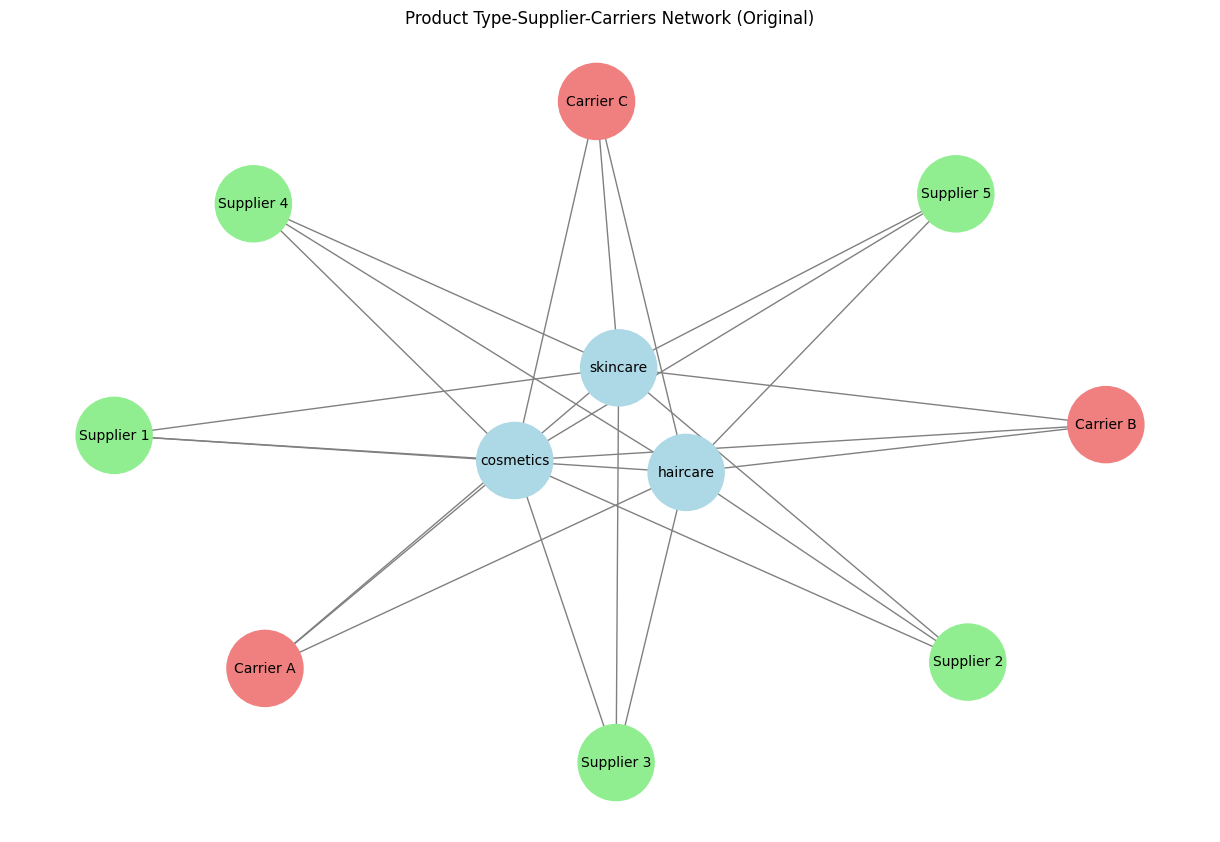

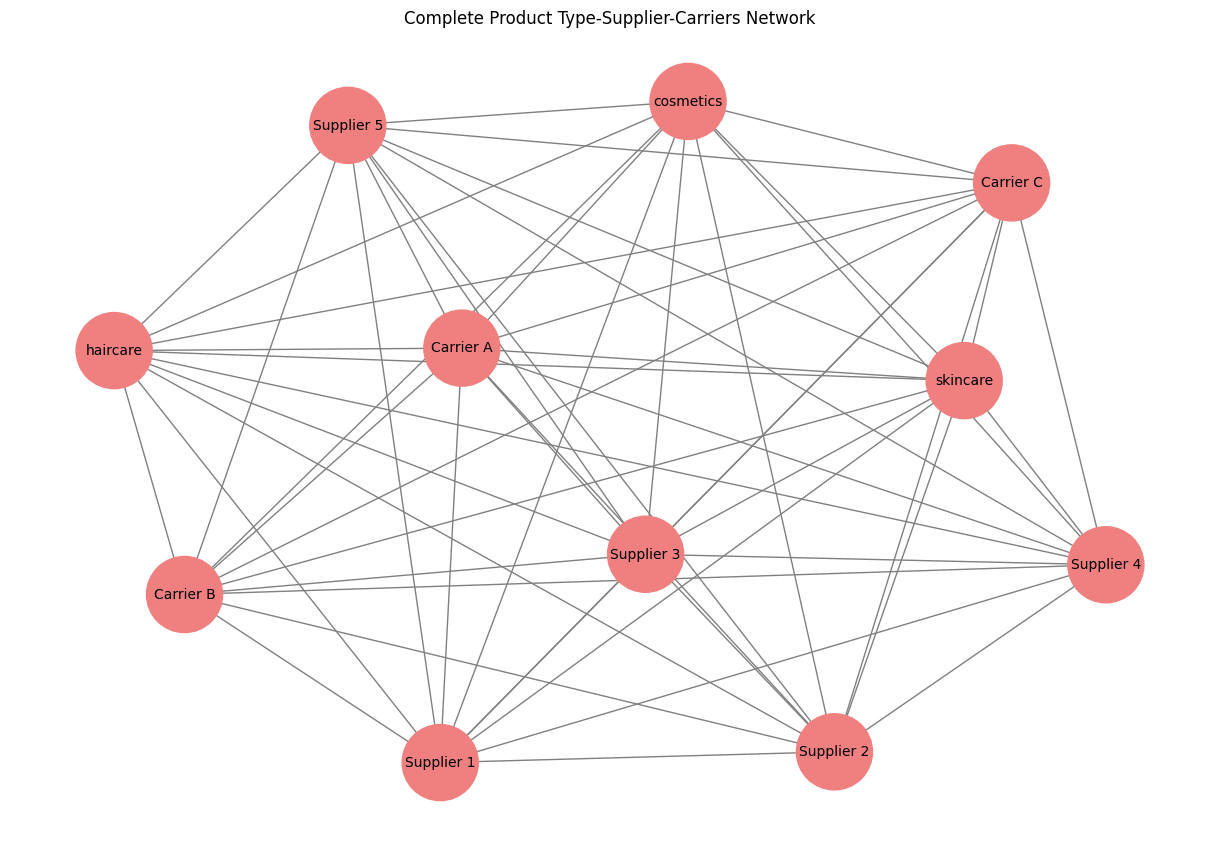

In [ ]:


# Filter the dataset to include only specific product types
filtered_df = df[df['Product type'].isin(['haircare', 'skincare', 'cosmetics'])]

# Create an undirected graph for Product Type-Supplier-Carriers Network
G = nx.Graph()

# Adding nodes for Product Types
product_types = ['haircare', 'skincare', 'cosmetics']
for product_type in product_types:
    G.add_node(product_type, type='product')  # Ensure 'type' attribute is set

# Adding edges for Product Types to Suppliers and Shipping Carriers
for index, row in filtered_df.iterrows():
    product_type = row['Product type']
    supplier = row['Supplier name']
    carrier = row['Shipping carriers']

    # Adding nodes for Suppliers and Shipping Carriers
    if supplier not in G:
        G.add_node(supplier, type='supplier')  # Ensure 'type' attribute is set
    if carrier not in G:
        G.add_node(carrier, type='carrier')    # Ensure 'type' attribute is set

    # Adding edges from Product Types to Suppliers and Shipping Carriers
    G.add_edge(product_type, supplier)
    G.add_edge(product_type, carrier)

# Function to draw the graph
def draw_graph(G, title):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    node_colors = ['lightblue' if G.nodes[n].get('type') == 'product' else 'lightgreen' if G.nodes[n].get('type') == 'supplier' else 'lightcoral' for n in G.nodes]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=3000, font_size=10)
    plt.title(title)
    plt.show()

# Draw the initial Product Type-Supplier-Carriers Network graph
draw_graph(G, "Product Type-Supplier-Carriers Network (Original)")

# Create a complete graph from the original graph
G_complete = nx.complete_graph(G)

# Draw the Complete Graph
draw_graph(G_complete, "Complete Product Type-Supplier-Carriers Network")


Bipartite graph

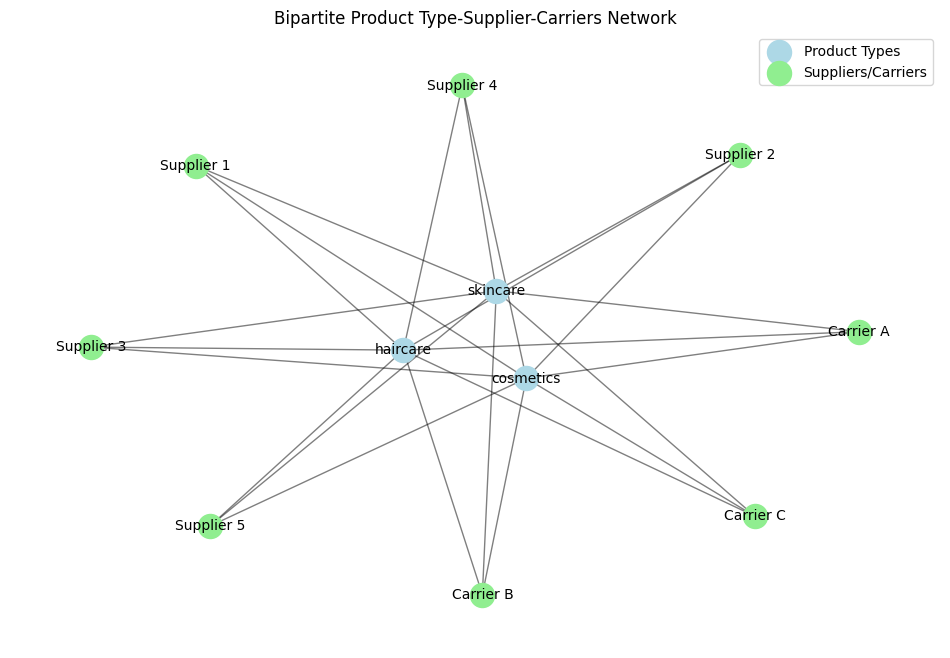

In [ ]:


# Filter the dataset to include only specific product types
filtered_df = df[df['Product type'].isin(['haircare', 'skincare', 'cosmetics'])]

# Create a bipartite graph for Product Types and Suppliers/Carriers
B = nx.Graph()

# Create lists of nodes for each partition
product_types = ['haircare', 'skincare', 'cosmetics']
suppliers_carriers = list(filtered_df['Supplier name'].unique()) + list(filtered_df['Shipping carriers'].unique())

# Add nodes from each partition
B.add_nodes_from(product_types, bipartite=0)  # Product types partition
B.add_nodes_from(suppliers_carriers, bipartite=1)  # Suppliers/Carriers partition

# Add edges between product types and suppliers/carriers
for index, row in filtered_df.iterrows():
    product_type = row['Product type']
    supplier = row['Supplier name']
    carrier = row['Shipping carriers']

    # Adding edges from Product Types to Suppliers and Shipping Carriers
    B.add_edge(product_type, supplier)
    B.add_edge(product_type, carrier)

# Function to draw the graph
def draw_bipartite_graph(B, title):
    pos = nx.spring_layout(B)
    plt.figure(figsize=(12, 8))

    # Separate nodes by partition for coloring
    product_nodes = [n for n, d in B.nodes(data=True) if d['bipartite'] == 0]
    supplier_carrier_nodes = [n for n, d in B.nodes(data=True) if d['bipartite'] == 1]

    nx.draw_networkx_nodes(B, pos, nodelist=product_nodes, node_color='lightblue', label='Product Types')
    nx.draw_networkx_nodes(B, pos, nodelist=supplier_carrier_nodes, node_color='lightgreen', label='Suppliers/Carriers')
    nx.draw_networkx_edges(B, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(B, pos, font_size=10, font_color='black', font_family='sans-serif')

    plt.title(title)
    plt.legend()
    plt.axis('off')
    plt.show()

# Draw the Bipartite Graph
draw_bipartite_graph(B, "Bipartite Product Type-Supplier-Carriers Network")


Tree Graph

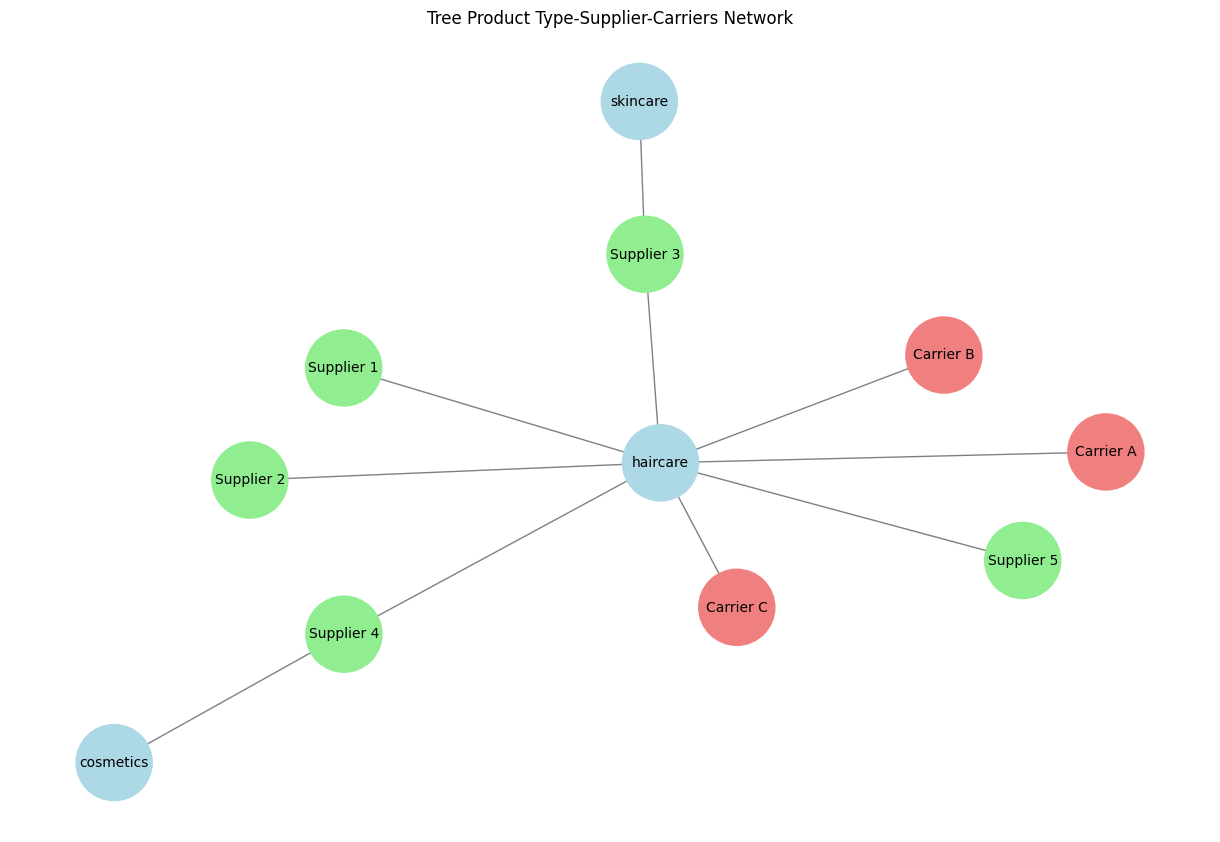

In [ ]:
# Create a tree graph from the current graph
G_tree = nx.minimum_spanning_tree(G)

# Draw the Tree Graph
draw_graph(G_tree, "Tree Product Type-Supplier-Carriers Network")


Scale- Free Graph

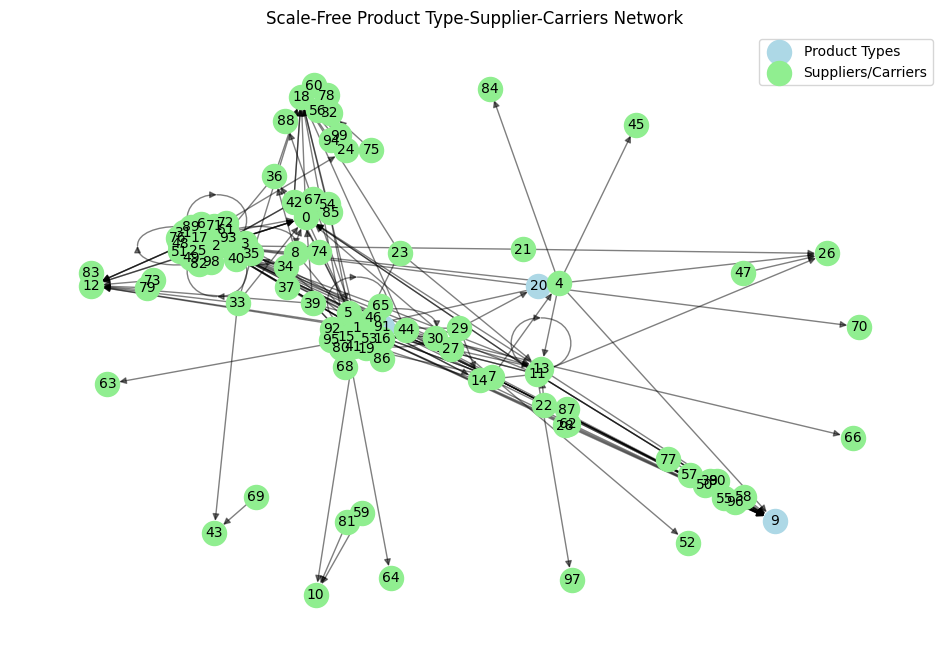

In [ ]:
import random
# Filter the dataset to include only specific product types
filtered_df = df[df['Product type'].isin(['haircare', 'skincare', 'cosmetics'])]

# Create a scale-free graph
SF = nx.scale_free_graph(len(filtered_df))

# Add nodes and edges based on product types and suppliers/carriers
product_types = ['haircare', 'skincare', 'cosmetics']

# Assign nodes to product types
nodes = list(SF.nodes())
random.shuffle(nodes)
for idx, product_type in enumerate(product_types):
    SF.nodes[nodes[idx]]['type'] = 'product'

# Assign remaining nodes to suppliers/carriers
for idx in range(len(product_types), len(nodes)):
    SF.nodes[nodes[idx]]['type'] = 'supplier_carrier'

# Function to draw the graph
def draw_scale_free_graph(SF, title):
    pos = nx.spring_layout(SF)
    plt.figure(figsize=(12, 8))

    # Separate nodes by type for coloring
    product_nodes = [n for n, d in SF.nodes(data=True) if d['type'] == 'product']
    supplier_carrier_nodes = [n for n, d in SF.nodes(data=True) if d['type'] == 'supplier_carrier']

    nx.draw_networkx_nodes(SF, pos, nodelist=product_nodes, node_color='lightblue', label='Product Types')
    nx.draw_networkx_nodes(SF, pos, nodelist=supplier_carrier_nodes, node_color='lightgreen', label='Suppliers/Carriers')
    nx.draw_networkx_edges(SF, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(SF, pos, font_size=10, font_color='black', font_family='sans-serif')

    plt.title(title)
    plt.legend()
    plt.axis('off')
    plt.show()

# Draw the Scale-Free Graph
draw_scale_free_graph(SF, "Scale-Free Product Type-Supplier-Carriers Network")

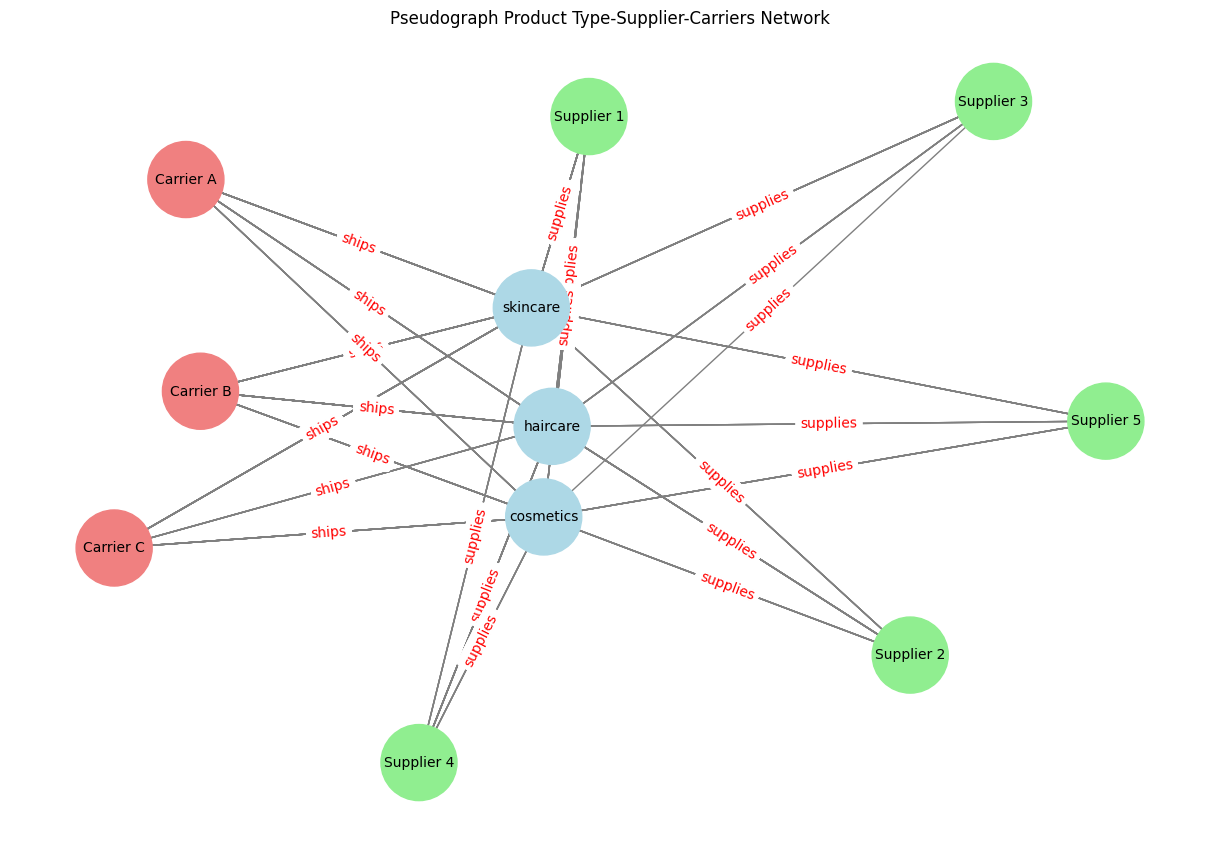

In [ ]:


# Filter the dataset to include only specific product types
filtered_df = df[df['Product type'].isin(['haircare', 'skincare', 'cosmetics'])]

# Create a pseudograph
PG = nx.MultiGraph()

# Add nodes and edges based on product types and suppliers/carriers
product_types = ['haircare', 'skincare', 'cosmetics']

# Adding nodes for Product Types
PG.add_nodes_from(product_types, type='product')

# Adding edges for Product Types to Suppliers and Shipping Carriers
for index, row in filtered_df.iterrows():
    product_type = row['Product type']
    supplier = row['Supplier name']
    carrier = row['Shipping carriers']

    # Adding nodes for Suppliers and Shipping Carriers if not already added
    if not PG.has_node(supplier):
        PG.add_node(supplier, type='supplier')
    if not PG.has_node(carrier):
        PG.add_node(carrier, type='carrier')

    # Adding edges from Product Types to Suppliers and Shipping Carriers
    PG.add_edge(product_type, supplier, relation='supplies')
    PG.add_edge(product_type, carrier, relation='ships')

# Function to draw the graph
def draw_pseudograph(PG, title):
    pos = nx.spring_layout(PG)
    plt.figure(figsize=(12, 8))
    node_colors = ['lightblue' if PG.nodes[n]['type'] == 'product' else 'lightgreen' if PG.nodes[n]['type'] == 'supplier' else 'lightcoral' for n in PG.nodes]
    edge_labels = {(u, v, k): d['relation'] for u, v, k, d in PG.edges(data=True, keys=True)}
    nx.draw(PG, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=3000, font_size=10)
    nx.draw_networkx_edge_labels(PG, pos, edge_labels=edge_labels, font_color='red')
    plt.title(title)
    plt.show()

# Draw the Pseudograph
draw_pseudograph(PG, "Pseudograph Product Type-Supplier-Carriers Network")
